In [15]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Netflix Dataset.csv")

# --- Shape of Dataset ---
print("Shape of Dataset:")
print(df.shape)
print("\\n" + "-"*20 + "\\n")

# --- Columns ---
print("Columns:")
print(df.columns.tolist())
print("\\n" + "-"*20 + "\\n")

# --- Missing Values ---
print("Missing Values:")
print(df.isnull().sum())
print("\\n" + "-"*20 + "\\n")


# --- Category Distribution ---
print("Category Distribution:")
print(df['Category'].value_counts())
print("\\n" + "-"*20 + "\\n")


# --- Top 5 Countries ---
df_copy = df.copy()
df_copy['Country'].fillna('Unknown', inplace=True)
print("Top 5 Countries:")
print(df_copy['Country'].value_counts().head(5))
print("\\n" + "-"*20 + "\\n")


# --- Year Range ---
release_dates = pd.to_datetime(df['Release_Date'], errors='coerce')
valid_years = release_dates.dropna().dt.year
print(f"Dataset covers years from {int(valid_years.min())} to {int(valid_years.max())}")

Shape of Dataset:
(7789, 11)
\n--------------------\n
Columns:
['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']
\n--------------------\n
Missing Values:
Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64
\n--------------------\n
Category Distribution:
Category
Movie      5379
TV Show    2410
Name: count, dtype: int64
\n--------------------\n
Top 5 Countries:
Country
United States     2556
India              923
Unknown            507
United Kingdom     397
Japan              226
Name: count, dtype: int64
\n--------------------\n
Dataset covers years from 2008 to 2021


/tmp/ipython-input-1729262607.py:30: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the dataset
df = pd.read_csv('Netflix Dataset.csv')

# Display the first few rows to confirm it's loaded correctly
print(df.head())

  Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

        Release_Date Rating   Duration  \
0    August 14, 2020  TV-MA  4 Seasons   
1  December 23, 2016  TV-MA     93 min   
2  December 20, 2018      R     78 min   
3  November 16, 2017  PG-13     80 min   
4    January 1, 2020  PG-13    123 min   

                               

In [8]:
# Handle missing values
df.fillna({'Director': 'Not Available', 'Cast': 'Not Available'}, inplace=True)
for col in ['Country', 'Rating', 'Duration']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Convert 'Release_Date' to datetime and create a 'release_year' column
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df.dropna(subset=['Release_Date'], inplace=True) # Drop rows where date conversion failed
df['release_year'] = df['Release_Date'].dt.year
df['release_year'] = df['release_year'].astype(int)


print("Data cleaning and preparation complete.")

Data cleaning and preparation complete.


/tmp/ipython-input-3100870460.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


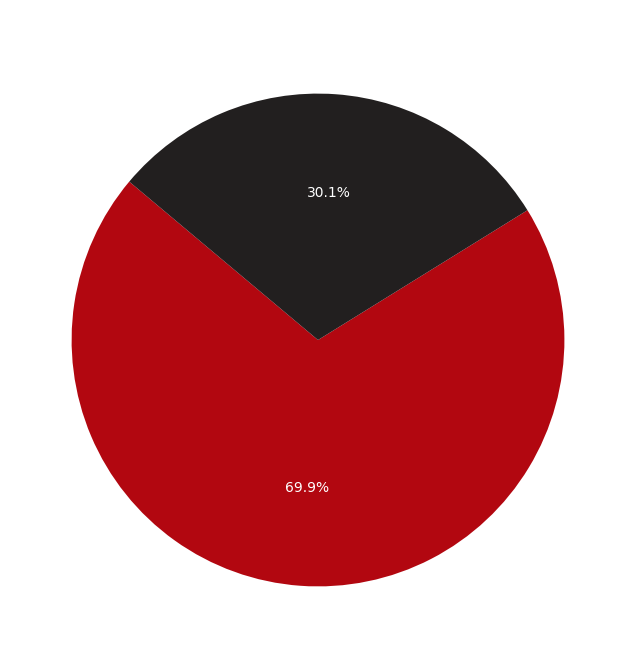

In [9]:
plt.figure(figsize=(8, 8))
df['Category'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=140,
    colors=['#b20710', '#221f1f'],
    textprops={'color':"w"}
)
plt.title('Distribution of Movies vs. TV Shows', color='white')
plt.ylabel('')
plt.show()

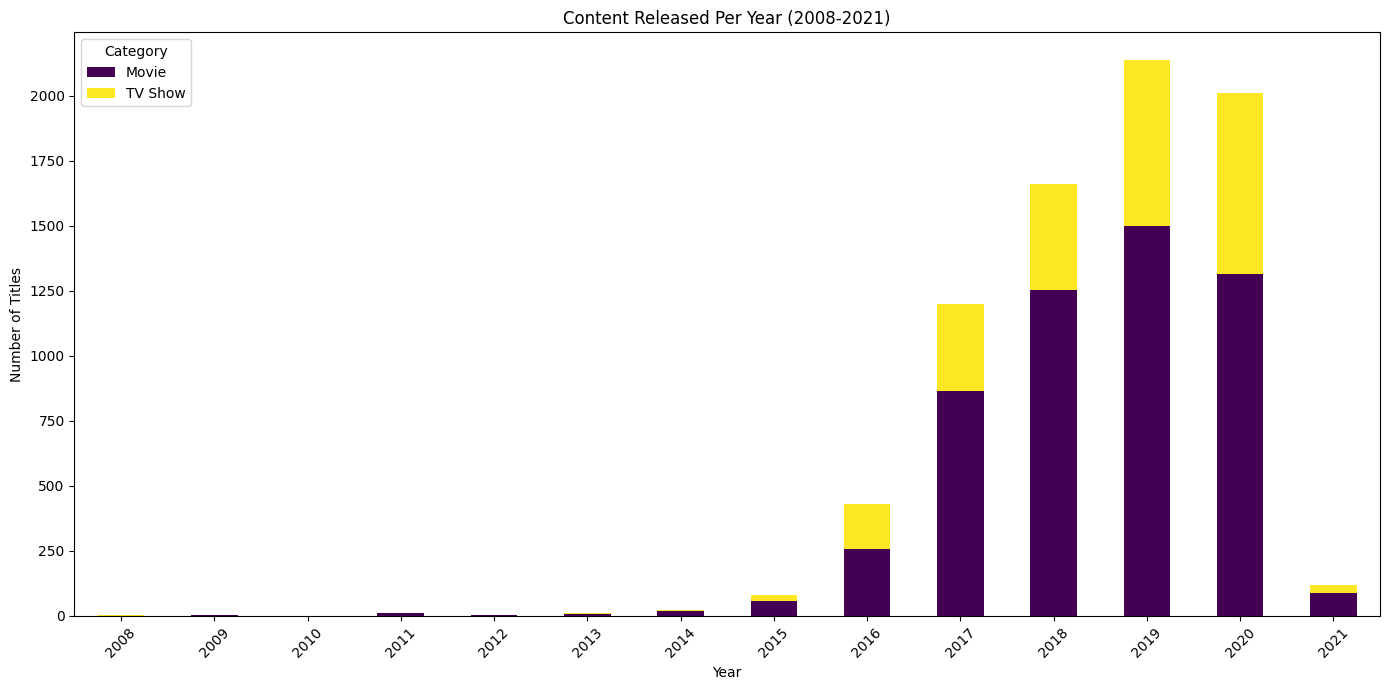

In [10]:
# Filter for years 2008 and later for a clearer view
yearly_content = df[df['release_year'] >= 2008].groupby(['release_year', 'Category']).size().unstack(fill_value=0)

yearly_content.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')
plt.title('Content Released Per Year (2008-2021)')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1791705367.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Main_Genre', data=df, order=df['Main_Genre'].value_counts().index[:15], palette='mako')


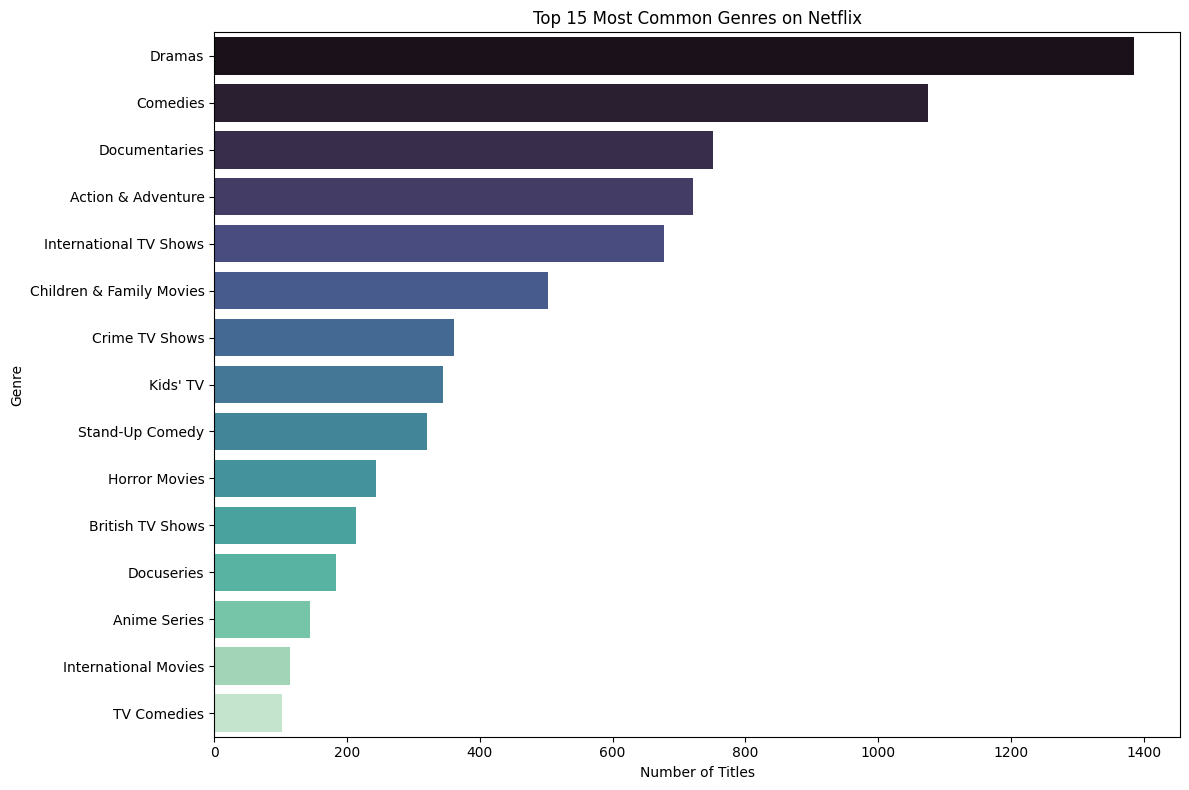

In [11]:
# Create the 'Main_Genre' column
df['Main_Genre'] = df['Type'].apply(lambda x: x.split(',')[0])

# Plot the top 15 genres
plt.figure(figsize=(12, 8))
sns.countplot(y='Main_Genre', data=df, order=df['Main_Genre'].value_counts().index[:15], palette='mako')
plt.title('Top 15 Most Common Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

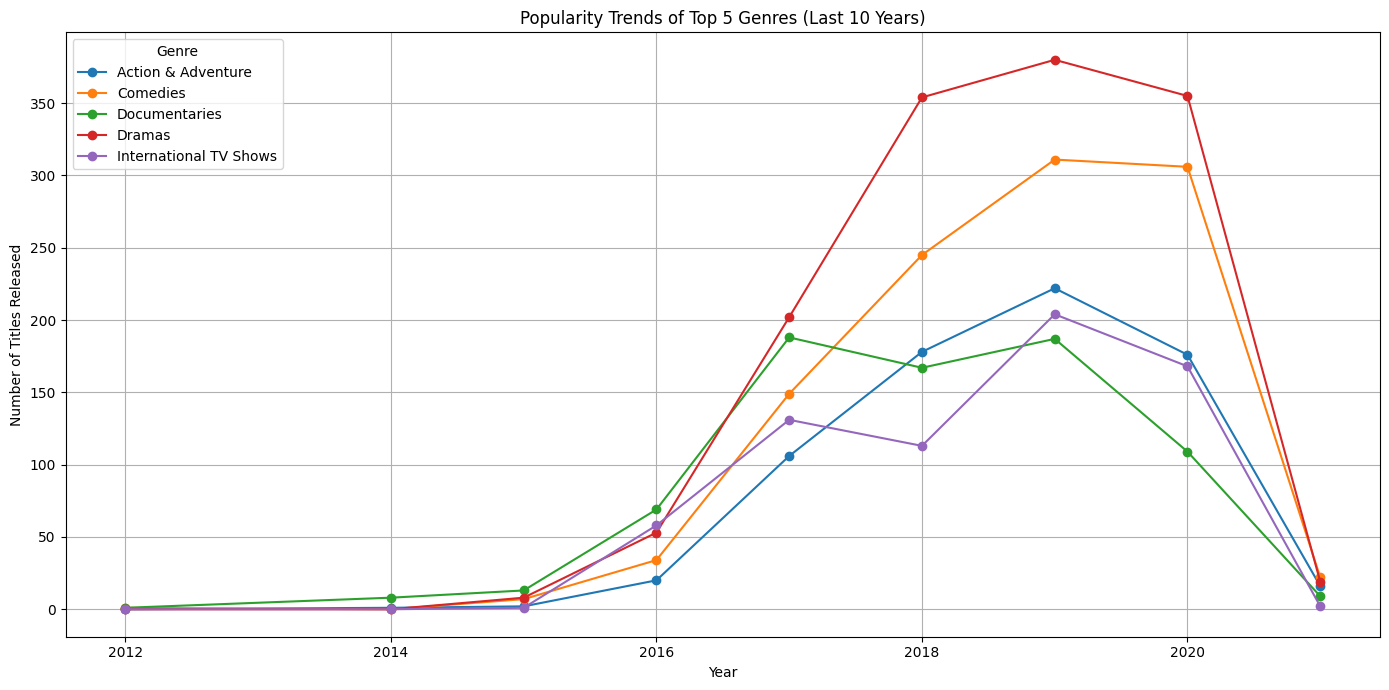

In [12]:
top_5_genres = df['Main_Genre'].value_counts().nlargest(5).index
genre_trends = df[df['Main_Genre'].isin(top_5_genres) & (df['release_year'] >= 2012)]
genre_yearly = genre_trends.groupby(['release_year', 'Main_Genre']).size().unstack(fill_value=0)

genre_yearly.plot(kind='line', marker='o', figsize=(14, 7))
plt.title('Popularity Trends of Top 5 Genres (Last 10 Years)')
plt.xlabel('Year')
plt.ylabel('Number of Titles Released')
plt.legend(title='Genre')
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2095851572.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Country', data=df, order=df['Country'].value_counts().index[:10], palette='rocket')


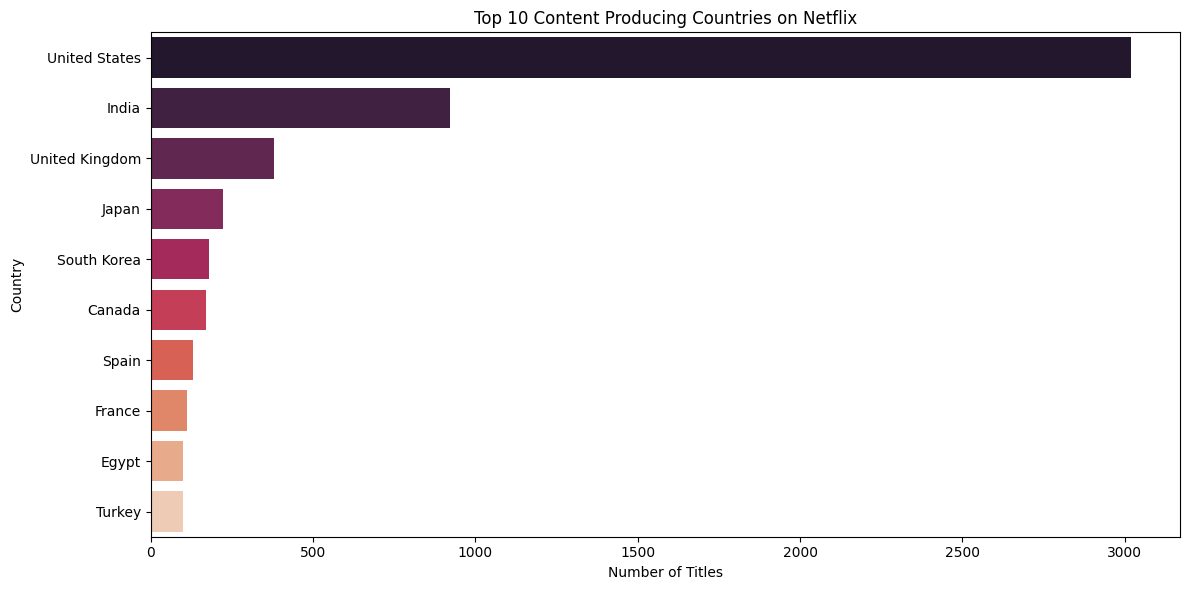

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Country', data=df, order=df['Country'].value_counts().index[:10], palette='rocket')
plt.title('Top 10 Content Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [14]:
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

fig = px.choropleth(
    country_counts,
    locations='Country',
    locationmode='country names',
    color='Count',
    hover_name='Country',
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Global Distribution of Netflix Content'
)
fig.show()

In [26]:
import pandas as pd
import plotly.express as px

# --- Step 1: Load and Prepare Data ---
df = pd.read_csv('Netflix Dataset.csv')
df['Main_Genre'] = df['Type'].apply(lambda x: x.split(',')[0])
df['Country'].fillna('Unknown', inplace=True)


# --- Step 2: Prepare Data for Treemap ---
# Filter for top 10 countries
top_10_countries = df['Country'].value_counts().nlargest(10).index
df_top_countries = df[df['Country'].isin(top_10_countries)]

# Aggregate data
treemap_data = df_top_countries.groupby(['Country', 'Main_Genre']).size().reset_index(name='count')


# --- Step 3: Create the Treemap ---
fig = px.treemap(
    treemap_data,
    path=[px.Constant("all"), 'Country', 'Main_Genre'], # Defines the hierarchy
    values='count',                                    # Defines the size of the rectangles
    color='count',                                     # Color intensity by count
    hover_data=['count'],
    color_continuous_scale='YlOrRd',
    title='Treemap of Top Genres within Top 10 Countries'
)

fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

/tmp/ipython-input-1116955509.py:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





/tmp/ipython-input-4082035655.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




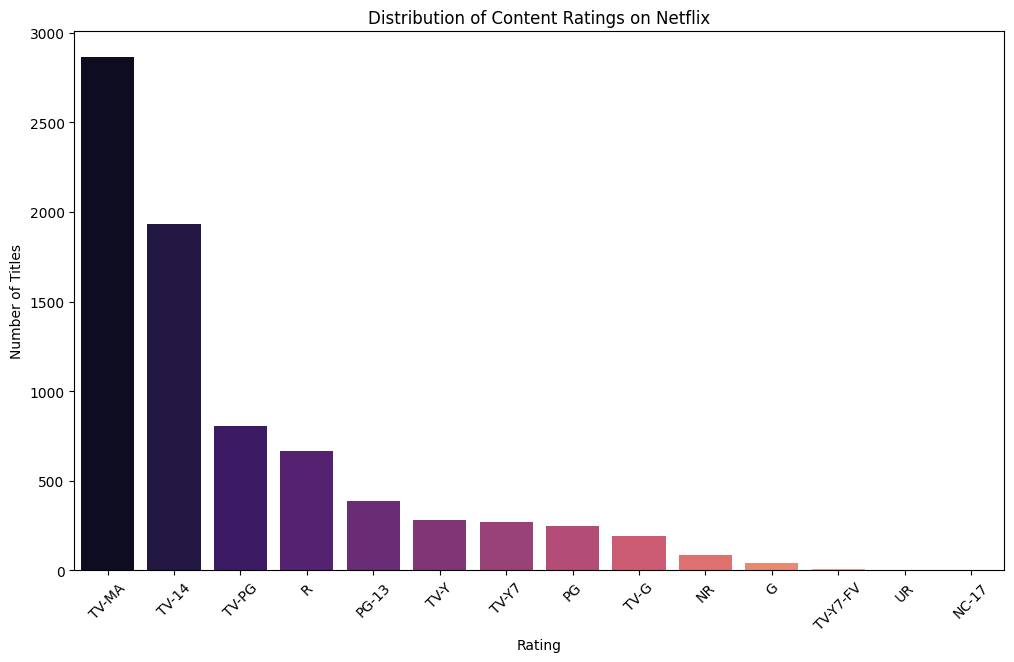

In [16]:
plt.figure(figsize=(12, 7))
sns.countplot(x='Rating', data=df, order=df['Rating'].value_counts().index, palette='magma')
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

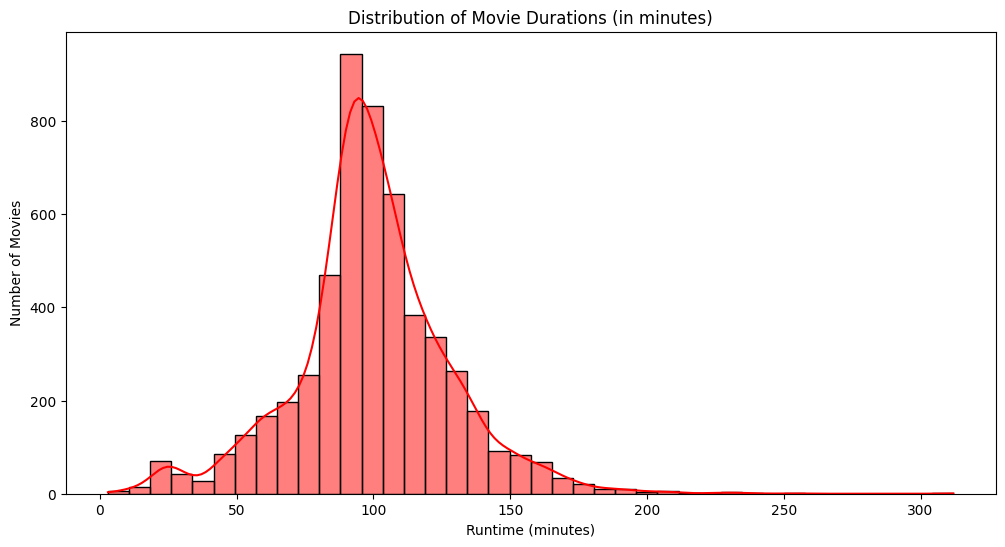

In [17]:
# Filter for movies and create a new DataFrame
movies_df = df[df['Category'] == 'Movie'].copy()

# Convert 'Duration' to a numeric type, extracting the number
movies_df['runtime'] = movies_df['Duration'].str.replace(' min', '').astype(int)

# Create the histogram
plt.figure(figsize=(12, 6))
sns.histplot(movies_df['runtime'], bins=40, kde=True, color='red')
plt.title('Distribution of Movie Durations (in minutes)')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Movies')
plt.show()

/tmp/ipython-input-406703767.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




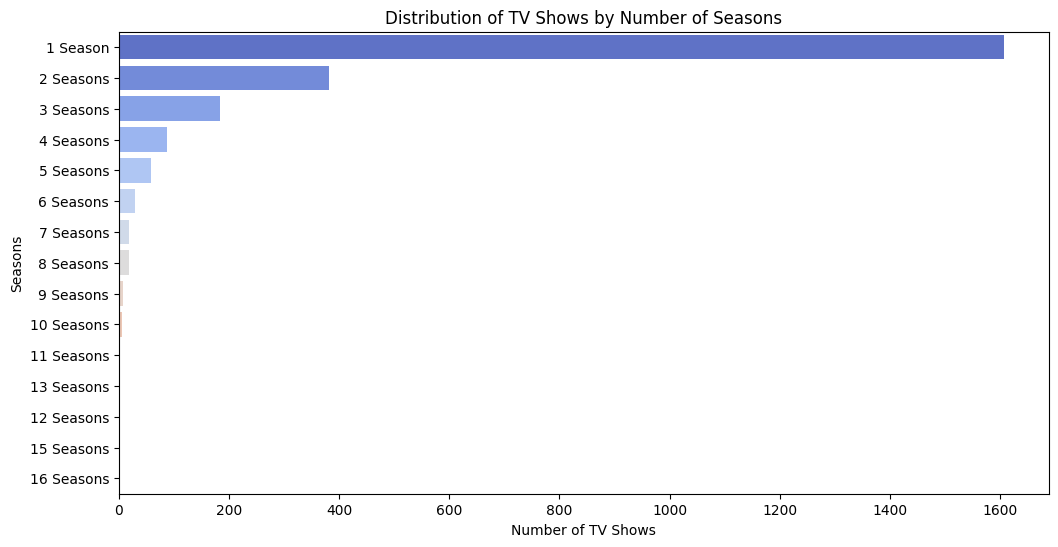

In [18]:
# Filter for TV Shows
tv_shows_df = df[df['Category'] == 'TV Show'].copy()

# Plot the count of shows by the number of seasons
plt.figure(figsize=(12, 6))
sns.countplot(y='Duration', data=tv_shows_df, order=tv_shows_df['Duration'].value_counts().index, palette='coolwarm')
plt.title('Distribution of TV Shows by Number of Seasons')
plt.xlabel('Number of TV Shows')
plt.ylabel('Seasons')
plt.show()

/tmp/ipython-input-3308042844.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




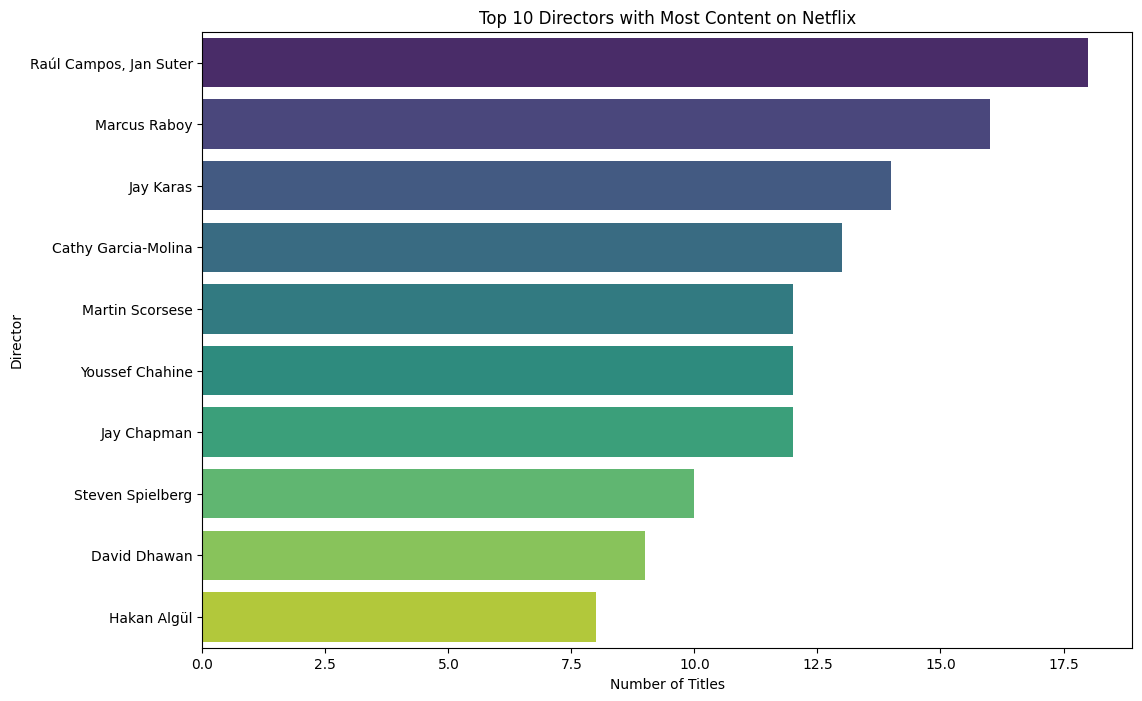

In [19]:
# Filter out the 'Not Available' directors
top_directors = df[df['Director'] != 'Not Available']

# Plot the top 10 directors
plt.figure(figsize=(12, 8))
sns.countplot(y='Director', data=top_directors, order=top_directors['Director'].value_counts().head(10).index, palette='viridis')
plt.title('Top 10 Directors with Most Content on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

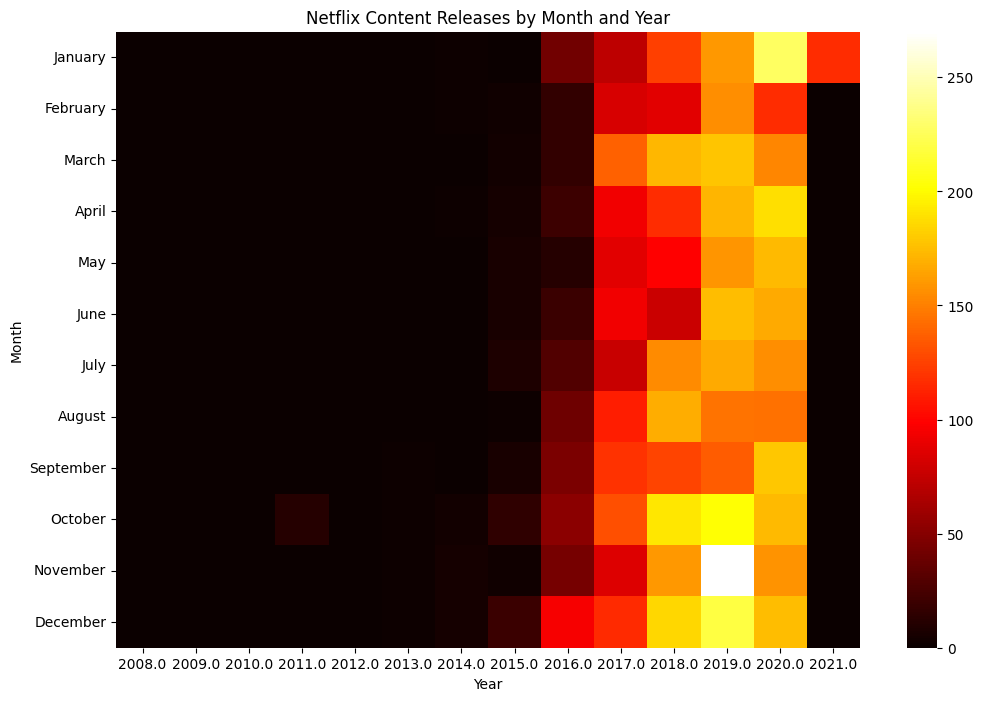

In [22]:
# Convert 'Release_Date' to datetime before using .dt accessor
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Create the 'release_year' column
df['release_year'] = df['Release_Date'].dt.year

# Extract the month name from the Release_Date
df['release_month'] = df['Release_Date'].dt.month_name()

# Create a pivot table to count releases by year and month
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
release_heatmap = df.groupby('release_year')['release_month'].value_counts().unstack().fillna(0)[month_order].T

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(release_heatmap, cmap='hot', annot=False)
plt.title('Netflix Content Releases by Month and Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

/tmp/ipython-input-1228229636.py:11: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-1228229636.py:36: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-1228229636.py:44: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




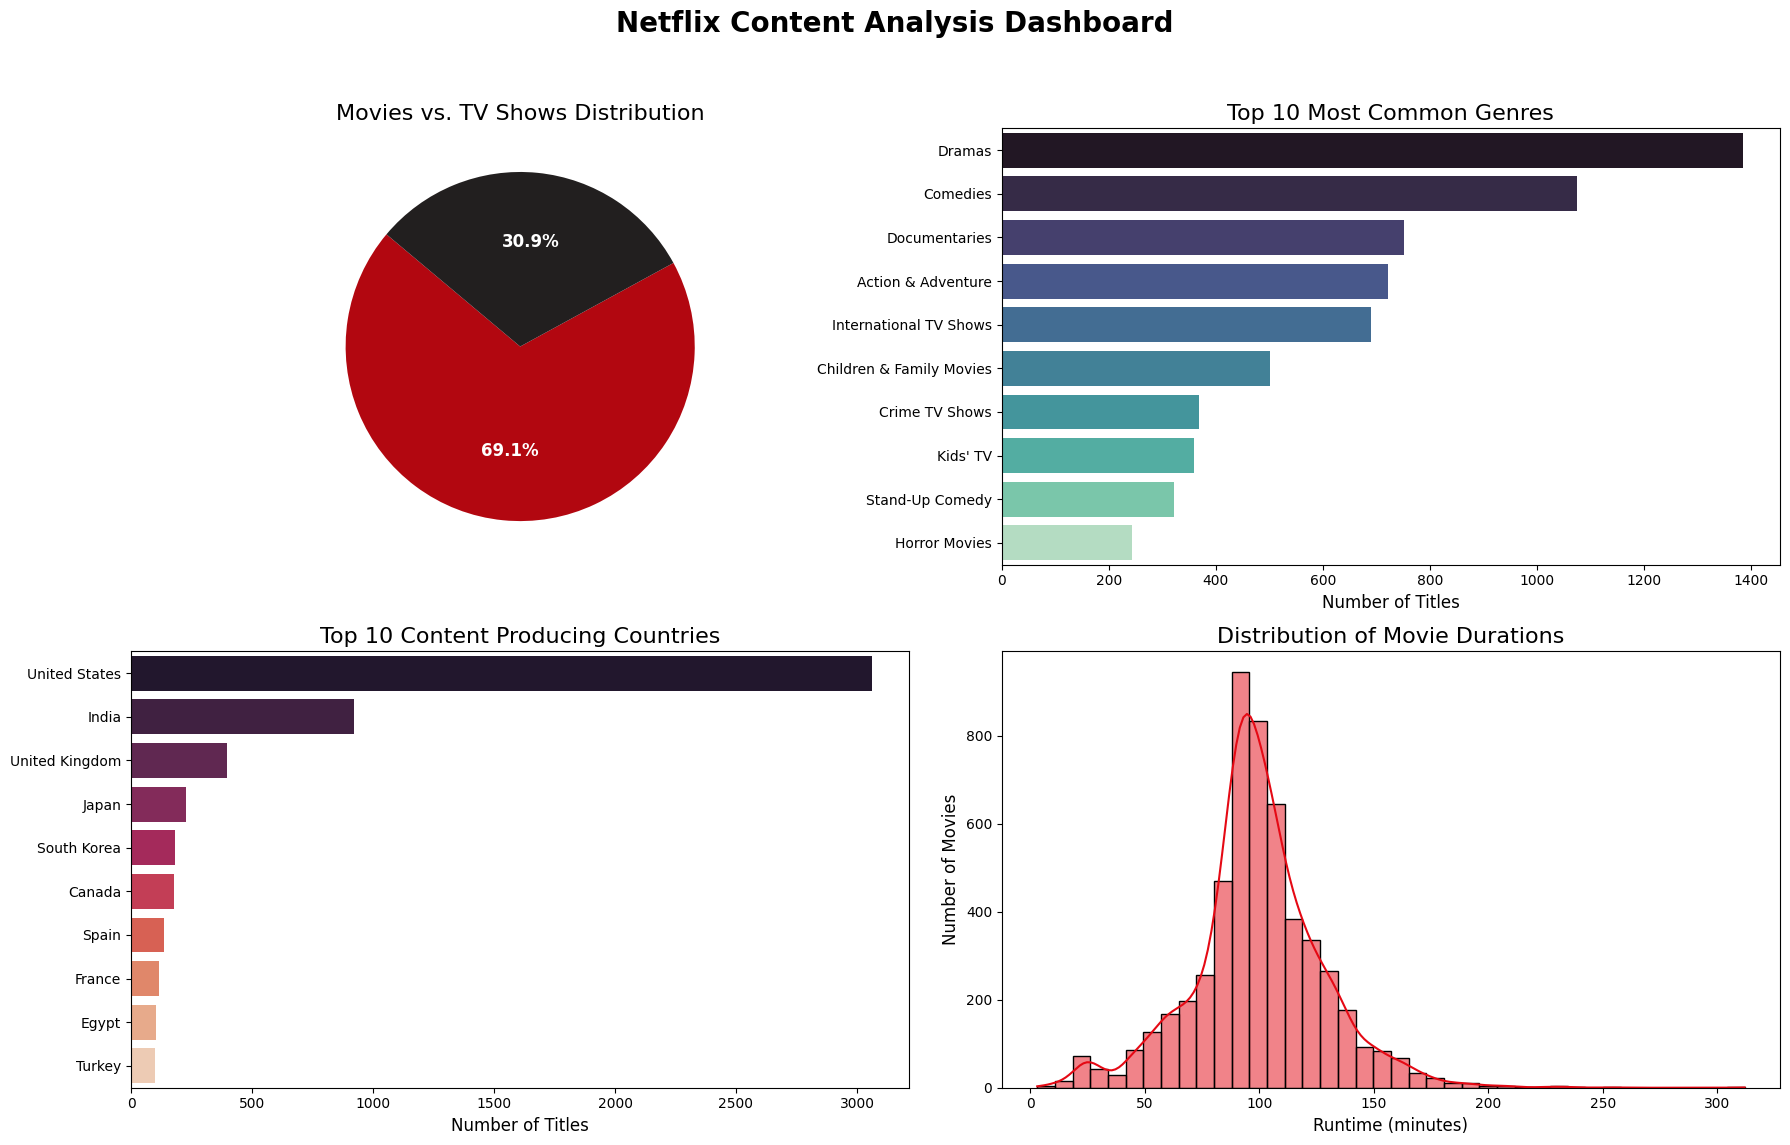

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Load and Prepare Data ---
df = pd.read_csv('Netflix Dataset.csv')

# Handle missing values
df.fillna({'Director': 'Not Available', 'Cast': 'Not Available'}, inplace=True)
for col in ['Country', 'Rating', 'Duration']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Create Main_Genre column
df['Main_Genre'] = df['Type'].apply(lambda x: x.split(',')[0])

# Prepare data for movie runtimes
movies_df = df[df['Category'] == 'Movie'].copy()
movies_df['runtime'] = movies_df['Duration'].str.replace(' min', '').astype(int)


# --- Step 2: Create a 2x2 Dashboard Figure ---
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Netflix Content Analysis Dashboard', fontsize=20, weight='bold')


# --- Plot 1: Movies vs. TV Shows Distribution (Top-Left) ---
category_counts = df['Category'].value_counts()
axes[0, 0].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%',
               startangle=140, colors=['#b20710', '#221f1f'],
               textprops={'fontsize': 12, 'color': 'white', 'weight': 'bold'})
axes[0, 0].set_title('Movies vs. TV Shows Distribution', fontsize=16)


# --- Plot 2: Top 10 Genres (Top-Right) ---
top_genres = df['Main_Genre'].value_counts().nlargest(10)
sns.barplot(ax=axes[0, 1], y=top_genres.index, x=top_genres.values, palette='mako', orient='h')
axes[0, 1].set_title('Top 10 Most Common Genres', fontsize=16)
axes[0, 1].set_xlabel('Number of Titles', fontsize=12)
axes[0, 1].set_ylabel('')


# --- Plot 3: Top 10 Content Producing Countries (Bottom-Left) ---
top_countries = df['Country'].value_counts().nlargest(10)
sns.barplot(ax=axes[1, 0], y=top_countries.index, x=top_countries.values, palette='rocket', orient='h')
axes[1, 0].set_title('Top 10 Content Producing Countries', fontsize=16)
axes[1, 0].set_xlabel('Number of Titles', fontsize=12)
axes[1, 0].set_ylabel('')


# --- Plot 4: Distribution of Movie Runtimes (Bottom-Right) ---
sns.histplot(ax=axes[1, 1], data=movies_df, x='runtime', bins=40, kde=True, color='#e50914')
axes[1, 1].set_title('Distribution of Movie Durations', fontsize=16)
axes[1, 1].set_xlabel('Runtime (minutes)', fontsize=12)
axes[1, 1].set_ylabel('Number of Movies', fontsize=12)


# --- Final Touches ---
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for the suptitle
plt.show()

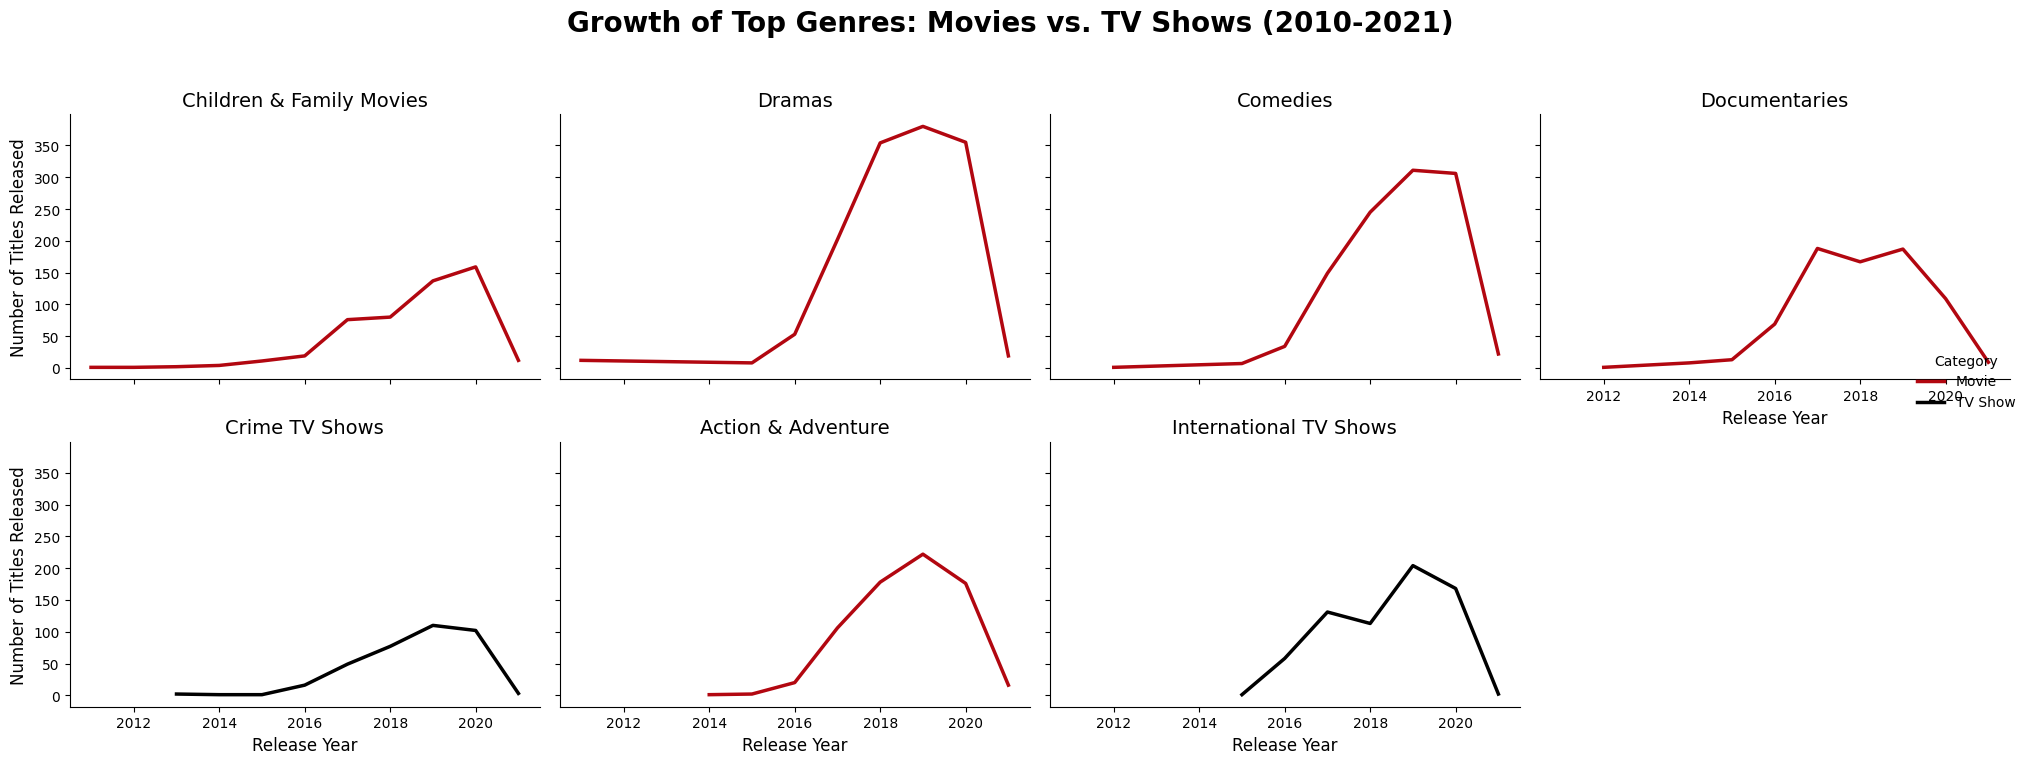

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Load and Prepare Data ---
df = pd.read_csv('Netflix Dataset.csv')

# Handle missing dates and create 'release_year'
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df.dropna(subset=['Release_Date'], inplace=True)
df['release_year'] = df['Release_Date'].dt.year.astype(int)

# Create Main_Genre column
df['Main_Genre'] = df['Type'].apply(lambda x: x.split(',')[0])


# --- Step 2: Isolate Top Genres and Aggregate Data ---

# Find the top 7 most common genres
top_7_genres = df['Main_Genre'].value_counts().nlargest(7).index

# Filter the DataFrame to only include these top genres
df_top_genres = df[df['Main_Genre'].isin(top_7_genres)]

# Group by year, genre, and category to get the count for each
genre_trends = df_top_genres.groupby(['release_year', 'Main_Genre', 'Category']).size().reset_index(name='count')

# Filter for recent years for a clearer trend view
genre_trends = genre_trends[genre_trends['release_year'] >= 2010]


# --- Step 3: Create the Multi-Faceted Visualization ---

# Use seaborn's relplot to create a grid of line charts
g = sns.relplot(
    data=genre_trends,
    x='release_year',
    y='count',
    hue='Category',      # Different colored lines for Movie vs. TV Show
    col='Main_Genre',    # Separate plots for each genre
    kind='line',         # Use a line plot to show trends
    col_wrap=4,          # Wrap the plots into a grid with 4 columns
    palette=['#b20710', '#000000'], # Netflix-themed colors
    height=4,
    aspect=1.2,
    linewidth=2.5
)

# --- Step 4: Customize and Finalize the Plot ---
g.fig.suptitle('Growth of Top Genres: Movies vs. TV Shows (2010-2021)', fontsize=20, weight='bold')
g.set_titles("{col_name}", size=14)
g.set_axis_labels("Release Year", "Number of Titles Released", fontsize=12)
g.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [25]:
import pandas as pd
import plotly.express as px

# --- Step 1: Load and Prepare Data ---
df = pd.read_csv('Netflix Dataset.csv')
df['Main_Genre'] = df['Type'].apply(lambda x: x.split(',')[0])

# --- Step 2: Prepare Data for Sunburst Chart ---
sunburst_data = df.groupby(['Category', 'Main_Genre']).size().reset_index(name='count')

# --- Step 3: Create the Sunburst Chart ---
fig = px.sunburst(
    sunburst_data,
    path=['Category', 'Main_Genre'],  # Defines the hierarchy
    values='count',                  # Defines the size of the sectors
    color='Category',                # Colors the chart by the top-level category
    color_discrete_map={'Movie': '#b20710', 'TV Show': '#000000'}, # Custom colors
    title='Netflix Content Hierarchy: Category to Genre Breakdown'
)

fig.update_traces(textinfo="label+percent parent")
fig.show()